# Numerical computing and data science - numpy, scipy, pandas
Numpy is the foundation for numerical computing in python. It enables fast numerical operations, by moving computationally expensive computations to faster code.

Numpy itself mainly provides "low-level" functions for handling vector data:
- multi-dimensional numerical arrays to represent vectors, matrices etc (`np.ndarray`)
- multi-dimensional indexing and slicing
- boolean indexing
- functions for searching and filtering data: min/max, argmax, where (e.g. find pos. values: how many, at which indices, which values?)
- basic statistical functions: np.sum, np.mean, np.std
- linear algebra (dot products, eigenvalues etc), Fourier transforms, interpolation

Numpy forms the basis for a whole eco system of scientific computing:
1. _Scipy_ provides more advanced algorithms. We will cover the following:
    - statistics and statistical tests (mean, std, ttest, anova, non-parametric tests)
    - linear regression and curve fitting
    - frequency analyses
2. _Pandas_ provides a way for handling tabular data with named columns and rows, plus the ability to load/save common file formats
    
_Numpy for matlab users_:
If you know Matlab, than numpy is conceptually very similar. Here is a great resource for matlab users that want to use numpy: [Numpy for Matlab users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html).

Last remark - numpy, scipy, and pandas are large packages, with many functions. We will only scratch the surface of what can be done with these.


## Why?
Numpy allows you to express common computations on arrays more concisely, without needing for loops. Numpy is also much faster.

86400000


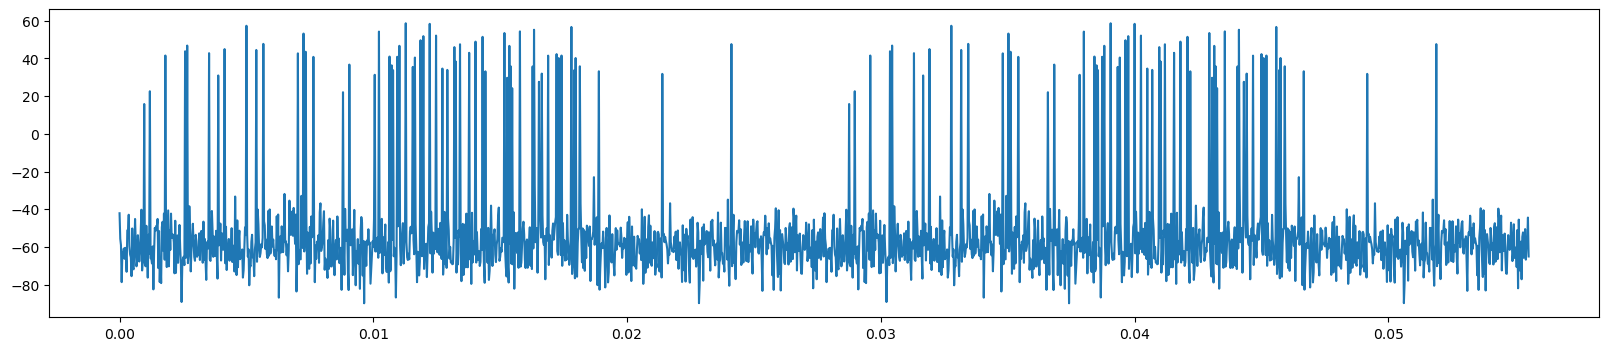

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('data/voltage_trace_long.npz')
voltages = data['voltage_trace']
times = data['times_seconds']
print(len(voltages))

plt.figure(figsize=(20, 4))
plt.plot(times[:2_000], voltages[:2_000])

threshold = 10

In [24]:
%%time
spike_times = []
for index in range(len(voltages)):
    if voltages[index] > threshold:
        spike_times.append(float(times[index]))
print(spike_times[:10])

[0.0009722222222222222, 0.0011944444444444446, 0.0018055555555555557, 0.0025833333333333333, 0.0026666666666666666, 0.0035277777777777772, 0.0038888888888888888, 0.004138888888888889, 0.005, 0.005388888888888888]
CPU times: user 8.51 s, sys: 115 ms, total: 8.63 s
Wall time: 8.63 s


With numpy this is a one-liner and almost 100x faster:

In [25]:
%%time
spike_times = times[voltages > threshold]
print(spike_times[:10])

[0.00097222 0.00119444 0.00180556 0.00258333 0.00266667 0.00352778
 0.00388889 0.00413889 0.005      0.00538889]
CPU times: user 103 ms, sys: 12.1 ms, total: 115 ms
Wall time: 114 ms


## From lists to numpy arrays
We have a list of numbers and want to subtract the mean from each value in the list.
This is how it looks using core python:

In [27]:
data = [24, 6, 32, 9, 32, 43]

# compute the mean
mean = 0
for d in data:
    mean = mean + d
mean = mean / len(data)

# subtract the mean from each element of the list
new_data = []
for d in data:
    new_data.append(d - mean)

new_data

[-0.33333333333333215,
 -18.333333333333332,
 7.666666666666668,
 -15.333333333333332,
 7.666666666666668,
 18.666666666666668]

Wouldn't it be nice if we could write code that is closer to how we would express the mathematical operation we want to perform, without needing a for loop?

Like, $\vec{y} = \vec{x} - m(\vec{x})$, where $m$ is a mathematical function that returns the mean of the elements in $\vec{x}$.

You can't do this with python lists, because python lists are a generic data type, not optimized for numerical data and computation.

This is exactly where numpy comes into play - it makes working with numerical data easier and faster, by providing a specialized numerical data type - the numpy array - and numerical functions:

In [28]:
import numpy as np  # this is the standard way of importing numpy, as np!

array = np.array(data)  # cast the list to a numpy array

new_array = array - np.mean(data)  # compute the mean and subtract it from each element in the array
new_array

array([ -0.33333333, -18.33333333,   7.66666667, -15.33333333,
         7.66666667,  18.66666667])

So, while you can express any computation using core python, often with for loops, numpy allows you to express these computations more concisely, without for loops.

In addition, numpy (and scipy) provide functions for many complex computations, so you don't have to implement them yourself.

Overall, this makes code easier to read (less text) and faster to execute.

We will see more examples of this below.

### Numpy arrays
A numpy array can be created from a python list using `np.array(my_list)`.

We can inspect the array:

In [9]:
import numpy as np

data = np.array([1,2,3,4])
data.dtype

dtype('int64')

Numpy arrays can be multi-dimensional. This is useful for a lot of scientific data you might encounter:
- black and white images are 2D matrices of pixel color values - XxY
- color images are 3D matrices of pixel color values - XxYxColor (Color=RGB)
- volumetric data (microscopy stacks, structural MRI stacks) are 3D matrices - stacks of images - XxYxZ
- behavioral videos or fMRI data can be represented as 3D matrices - a time series of images - XxYxTime
- multi-channel audio or electrophysiology data are often 2D matrices - TimexChannel

The following will create a matrix (2D array) from a nested list:

In [41]:
data = np.array([[24, 6, 32],[9, 32, 43]])
print(data)
data[0,::-1]

[[24  6 32]
 [ 9 32 43]]


array([32,  6, 24])

### Array creation

Numpy also provides tools for creating "empty" arrays of a specific size, to be filled with data later:

In [27]:
np.linspace(-2, 2, 10)

array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])

### Indexing and slicing
Indexing and slicing numpy arrays works similar as for lists.

In [30]:
data = np.array([24.4, 6.5, 32.3, 9.8, 32.1, 43.7])



However, numpy also provides multi-dimensional indexing:

In [33]:
data = np.array([[24, 6, 32],[9, 32, 43]])
data

array([[24,  6, 32],
       [ 9, 32, 43]])

One can also use arrays or lists as indices for arrays. This was not possible with lists. 

In [42]:
data = np.arange(0, 40, 2)

print(f"{data=}")


data=array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38])


```{admonition} Clicker question "numpy indexing"([Click me!](https://go.uos.de/kjcBV))
Which of the following expressions is correct?

```python
a = np.array([[1,2], [10, 20]])
[[ 1  2]
 [10 20]]

print(a[0, :]): [1, 2]
print(a[0]): [1]
print(a[:, 0]): [1, 20]
print(a[:, -1]): [2, 20]
```

__Important__ As with lists, the type of the indices must not be `float`. They should `int` or `bool`.

In [11]:
indices = np.array([1.0, 7.0, 18.0])
print(f"Indices are of type float: {indices.dtype=}")
print(f"This does not work: {data[indices]=}")

Indices are of type float: indices.dtype=dtype('float64')


IndexError: arrays used as indices must be of integer (or boolean) type

### Assigning values
Assignment works similarly to indexing:

In [12]:
d = np.zeros((10, 10))
print(d)

d[7, 2] = -1
print(d)

d[1:4, 5:8] = 100
print(d)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100. 100. 100.   0.   0.]
 [  0.   0.   0.   0.   0. 100. 100. 100.   0.   0.]
 [  0.   0.   0.   0.   0. 100. 100. 100.   0.   0.]
 [  0.   0.   0.   0.   0.

### Math

In [42]:
data = np.linspace(0, 1, 10)
print(f"{data=}")
print(f"{np.mean(data)=}")
print(f"{np.std(data)=}")
print(f"{np.diff(data)=}")

data=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])
np.mean(data)=np.float64(0.5)
np.std(data)=np.float64(0.31914236925211265)
np.diff(data)=array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])


In many numpy functions, the `axis` argument allows you to apply an operation to a specific axis, not to the full matrix.
This allows you to compute the mean only over rows, or only over columns.

In [43]:
data = np.array([[1, 2, 3], [10, 20, 30]])
print(f"{data=}")
print(f"Mean for the full matrix: {np.mean(data)=}")
print(f"For each column: {np.mean(data, axis=0)=}")
print(f"For each row: {np.mean(data, axis=1)=}")

data=array([[ 1,  2,  3],
       [10, 20, 30]])
Mean for the full matrix: np.mean(data)=np.float64(11.0)
For each column: np.mean(data, axis=0)=array([ 5.5, 11. , 16.5])
For each row: np.mean(data, axis=1)=array([ 2., 20.])


### Searching arrays and boolean indexing
Just like with math, we can also apply comparisons to all elements of an array. This creates boolean arrays:

In [16]:
data = np.array([[24, 6, 30, 9, 32, 43]])
print(f"{data=}")
print(f"{data<10=}")

data=array([[24,  6, 30,  9, 32, 43]])
data<10=array([[False,  True, False,  True, False, False]])


If all we care about is how many values match the condition, we simply take the sum. This works because True will be interpreted as 1 and False as 0 during summation. That way, all True values contribute with 1 to the sum:

In [17]:
print(f"{data=}")
print(f"{np.sum(data<10)=}")

data=array([[24,  6, 30,  9, 32, 43]])
np.sum(data<10)=np.int64(2)


Here's an example for a matrix with two rows. 

We can then use the boolean array as an index to only get the values in the array that match our condition (in this case "<10"). This will return only the data values for which the boolean index is `True`

In [24]:
data = np.array([[24, 6, 30, 9, 32, 43], [18, 3, 8, 89, 38, 5]])

print(f"{data=}")
print(f"{data < 10=}")
print(f"{data[data < 10]=}")


data=array([[24,  6, 30,  9, 32, 43],
       [18,  3,  8, 89, 38,  5]])
data < 10=array([[False,  True, False,  True, False, False],
       [False,  True,  True, False, False,  True]])
data[data < 10]=array([6, 9, 3, 8, 5])


We can count the total number of True values by summing over all values or we can count in rows or columns by summing only over columns and row, respectively:

In [25]:
print(f"{data=}")
print(f"{data.shape}")
print(f"{data<10=}")
print(f"Total number of True values: {np.sum(data<10)=}")
print(f"Number of True values in each column: {np.sum(data<10, axis=0)=}")
print(f"Number of True values in each row: {np.sum(data<10, axis=1)=}")

data=array([[24,  6, 30,  9, 32, 43],
       [18,  3,  8, 89, 38,  5]])
(2, 6)
data<10=array([[False,  True, False,  True, False, False],
       [False,  True,  True, False, False,  True]])
Total number of True values: np.sum(data<10)=np.int64(5)
Number of True values in each column: np.sum(data<10, axis=0)=array([0, 2, 1, 1, 0, 1])
Number of True values in each row: np.sum(data<10, axis=1)=array([2, 3])


```{admonition} Clicker question "numpy bool"([Click me!](https://go.uos.de/kjcBV))
Which of the following pairs of boolean expressions and results are correct?

```python
data = np.array([1, 0, 2, -1])

print(data > 0): array([ True, True,  False, False])
print(data > 0): array([ True, False,  True, False])

print(data >= 0): array([ True,  False,  False, False])
print(data >= 0): array([ True,  True,  True, False])

print(data == 2): array([True, True,  False, True])
print(data == 2): array([False, False,  True, False])
```
```


`np.where` will return the indices at which the expression is True:

In [26]:
rows, cols = np.where(data < 10)
print(f"{data.shape=}, {rows=}, {cols=}")

data.shape=(2, 6), rows=array([0, 0, 1, 1, 1]), cols=array([1, 3, 1, 2, 5])


To combine different conditions on a numpy array with `and` or `or`, we need to use `np.logical_and` or `np.logical_or`:

In [35]:
lower = data > 10
upper = data < 31
print(data)
print(lower)
print(upper)

both = np.logical_and(lower, upper)  # takes two boolean arrays, returns a new array in which only elements are True that where True in the two inputs - lower AND upper

print(both)
print(data[both])

[[24  6 30  9 32 43]
 [18  3  8 89 38  5]]
[[ True False  True False  True  True]
 [ True False False  True  True False]]
[[ True  True  True  True False False]
 [ True  True  True False False  True]]
[[ True False  True False False False]
 [ True False False False False False]]
[24 30 18]


In [36]:
lower = data < 10
upper = data > 31
print(data)
print(lower)
print(upper)

both = np.logical_or(lower, upper)  # takes two boolean arrays, returns a new array in which all elements are True that where True in at least one of the two inputs - lower OR upper

print(both)
print(data[both])

[[24  6 30  9 32 43]
 [18  3  8 89 38  5]]
[[False  True False  True False False]
 [False  True  True False False  True]]
[[False False False False  True  True]
 [False False False  True  True False]]
[[False  True False  True  True  True]
 [False  True  True  True  True  True]]
[ 6  9 32 43  3  8 89 38  5]


```{admonition} Clicker question "numpy boolean indexing"([Click me!](https://go.uos.de/kjcBV))
Which of these statements is correct?
```python
data = np.array([1, 0, 2, -1])
print(data[data == 0]): [0]
print(data[data > 0]): [1, 0, 2]
print(data[data < 1]): [0, -1]
print(data[data >-2]): [1, 0, 2, -1]
```
```

